# Exploratory Data Analysis and Feature Engineering

## Loading the libraries

For this module, you will need to import 

* `numpy` [link to documentation](https://docs.scipy.org/doc/)
* `pandas` [link to documentation](https://pandas.pydata.org/pandas-docs/stable/)
* `matplotlib.pyplot` [link to documentation](https://matplotlib.org/contents.html)
* `seaborn` [link to documentation](https://seaborn.pydata.org)

We will use `sklearn` as well but later and import it then. Remember to use the `?` and the `TAB` to help you with the code!


In [168]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Loading the data

For this module, you will consider a simple retail dataset consisting of history of purchases done by customers from a variety of country. The dataset is not of exceptional interest but will allow us to simply illustrate some of the standard steps that can be followed when having a first look at a datset.

**TASKS**

Load the dataset `retail_data.csv` with `pandas`. Recall that you need to 

* use the `read_csv()` method
* point to the location of the dataset (in the `data` folder)
* determine a name under which you want to store the resulting data frame (we suggest the name `customers`)
* specify that the `CustomerID` column is the index column using the `index_col` option

Use the `head` method to display the first few lines of the dataset (you can specify how many lines).

In [170]:
# add your code here
df = pd.read_csv('data/retail_data.csv', index_col = 'CustomerID')


### About the dataset

The dataset is based on data from an online retailer selling gifts and is based on a dataset taken from [here](https://archive.ics.uci.edu/ml/datasets/Online+Retail#).

We have taken the original data set and processed it to create a 'profile' for each customer, which includes a number of features including:

* `Country`: The country their purchases were made from.
* `balance`: Amount of money spent at the store (purchases minus refunds).
* `n_orders`: Total number of orders from the online retailer.
* `time_between_orders`: Average time (in days) between orders.
* `max_spent`: Most amount of money customer spent on a single order.

**TASKS**

* Check the dimensionality of the dataset using the `shape` attribute of the data frame.
* You can also retrieve a few *summary statistics* using the `describe` method.

In [171]:
# add your code here
print(df.shape)
df.describe

(3254, 11)


<bound method NDFrame.describe of                    Country   balance  max_spent    mean_spent  min_spent  \
CustomerID                                                                 
12346       United Kingdom      0.00   77183.60  38591.800000       0.00   
12348              Finland   3874.60    2248.80   1291.533333     478.80   
12350               Norway    294.40     294.40    294.400000     294.40   
12352               Norway   1845.13    1054.10    393.092000       0.00   
12354                Spain   1079.40    1079.40   1079.400000    1079.40   
12356             Portugal   6621.63    5011.34   3310.815000    1610.29   
12358              Austria    404.86     404.86    404.860000     404.86   
12360              Austria   4359.34    2984.60   2179.670000    1374.74   
12361              Belgium    174.90     174.90    174.900000     174.90   
12362              Belgium   4700.73    1437.00    787.255000       0.00   
12364              Belgium   1840.52    1840.52   1840

## Exploring the dataset

At this stage you do not really know what is going on in this dataset. 
You need to go beyond the first impression by considering simple questions like:

* How many customers are you dealing with?
* What country spends how much?
* What has been the company's profit during the last year?

**TASKS**

You will go through these questions and learn new tricks as you move along. The first one is easy to answer, you can use the `nunique()` method applied to the index column. You can retrieve the index column using the `index` attribute of the dataframe.

In [172]:
# how many unique customers are there?
print(df.index.nunique())
# what country spends how much?
print(df.groupby('Country')['total_spent'].apply(np.sum))

# company's raw profit
df['balance'].sum()

3254
Country
Austria              10619.20
Belgium              46252.29
Finland              31091.07
France              272068.47
Germany             325883.91
Italy                20046.71
Norway               34714.18
Portugal             33414.90
Spain                95774.83
Switzerland          67361.13
United Kingdom    10956792.07
Name: total_spent, dtype: float64


11700339.959999992

The result should match the number you obtained when inspecting the shape of the DataFrame

### Types of features and One-Hot-Encoding

Data can be both 

* on a *continuous* scale: e.g.: the amount of money spent in the store or time between purchases
* on a *discrete* scale: e.g.: the country.

Discrete variables that have a notion of ordering (for instance, a survey that asks your satisfaction on a scale of 1 to 5) are called *ordinal*. Discrete variables that cannot directly be ordered are usually referred to as *categorical* variables (eg: countries or gender).

In the feature engineering step, one typically needs to pay special attention to discrete variables as many models are not equipped to handle this type of data, particularly if they are just categorical.

In the case where categorical features are present, you need to represent them as numerical values. 
A standard approach to do so is the **one-hot encoding**. 
The input in one-hot encoding is the vector of discrete categorical values, and the output is a sparse matrix with 1s and 0s where each column corresponds to one possible value of the feature.
As an example, let's consider the following trivial dataset:

```
Nick, UK
Laura, IT
Massimo, IT
```

In this case, there are two countries `["UK", "IT"]`, the one-hot-encoding would correspond to the table

$
\begin{array}{l|cc}
& \text{UK} & \text{IT} \\\hline
\text{Nick} & 1 & 0\\
\text{Laura} &0& 1\\
\text{Massimo}&0 & 1
\end{array}
$

**TASKS**

In order to do that on the original dataset:

* select the column `Country` and call it `countries`
* using the function `get_dummies()` from `pandas`, apply the one-hot-encoding
* use `head()` to have a look and make sure it all makes sense
* drop the country column from the initial dataset using `drop` or `del` (so that it is not in our way when applying scaling)


In [173]:
# add your code here
countries = df['Country']
pd.get_dummies(countries).head()
# df.drop(axis = 'Country')
df = df.drop(labels = 'Country', axis = 1)

We are going to do pre-processing and imputation on the continuous features, so let's keep this separate for now and join it together later.

### Missing values and Imputation

You may have noticed that there are missing values in the data (`NaN`).
It's very important in general to check whether there are any and

* whether these missing values are informative or not
* whether you can replace the missing values in a sensible way or not

**TASKS**

First, check which column has missing values and how many.
For this, use

* the `isnull()` method applied on the data frame, this returns a dataframe similar to the original one but where every entry is just `True` or `False`
* on the resulting dataframe, apply the `sum()` method which will count how many entries of the column are `True`

In [174]:
# add your code here
pd.isnull(df).sum()

balance                    0
max_spent                  0
mean_spent                 0
min_spent                  0
n_orders                   0
time_between_orders     1368
total_items                0
total_items_returned       0
total_refunded             0
total_spent                0
dtype: int64

*What do you think might be the reason why some customers have missing values as their `time_between_orders`?*

In general, for columns with missing values, there are a few choices on how to handle them. 
This process is usually called *imputation*.

#### Imputation 

There are many strategies to help with missing data and they depend on whether the missing data is numeric or categorical. Recall that you can for example

* simply remove rows where there is missing data (e.g. `.dropna()` can achieve this)
* imputing the values with a summary statistic such as mean or median or most frequent value (e.g. `Imputer` from `sklearn` module)
* replace the values with a sensible estimate

What strategy is best for you problem very much depends on the specifics of your dataset. 

In the current case, the missing values are exclusively found in the `time_between_orders` column, so you should have a look at these rows where this occurs to see if we can gain an understanding of what may be causing these missing values.

**TASKS**

* select the customers for which `time_betwee_orders` is null. For this, use `isnull` on the appropriate column and feed it as row indices to the dataframe to retrieve a subdataframe only corresponding to those customers
* check the shape, make sure it worked!
* have a look at the resulting dataframe, can you spot anything strange? 

In [176]:
nan_customers = df[pd.isnull(df['time_between_orders'])]
df.loc[df.time_between_orders.isnull(),:]
# How many nan cases do we have? 
print(nan_customers.shape)

# Let's have a quick look
nan_customers.head(5)


# extract the customers that have nan values
# df.loc[df.time_between_orders.isnull(),:]

#to retrieve customers that have not nan values
# df.loc[df.time_between_orders.isnull(),:]


(1368, 10)


,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,
12346,0.00,77183.60,38591.80,0.00,2.0,NaN,74215.0,-74215.0,-77183.6,77183.60
12350,294.40,294.40,294.40,294.40,1.0,NaN,196.0,0.0,0.0,294.40
12354,1079.40,1079.40,1079.40,1079.40,1.0,NaN,530.0,0.0,0.0,1079.40
12358,404.86,404.86,404.86,404.86,1.0,NaN,98.0,0.0,0.0,404.86
12361,174.90,174.90,174.90,174.90,1.0,NaN,90.0,0.0,0.0,174.90


Note that `n_orders` seems to often be equal to `1`. 
There is a fairly obvious interpretation for those: since they haven't yet come back, there is no "time between orders".

**TASKS**

You can count the number of time specific values of `n_orders` occur by using the `value_counts()` method applied on the series corresponding to `n_orders`. 

In [177]:
# your code here
nan_customers["n_orders"].value_counts()


1.0    1168
2.0     175
3.0      21
4.0       3
8.0       1
Name: n_orders, dtype: int64

The overwhelming majority of missing values can therefore be explained by customers that have not returned before.
It is unclear at this point what the remaining 200 are. The dataset is of course fairly artificial so we won't discuss this in too much detail at this point. 

**TASKS**

In this case, we decide to fill the missing values by 365 days by using the `fillna()` function (this is a **fairly reckless** decision but, again, this notebook is more focused on tools and techniques)

* replace the column `time_between_orders` by the same column where the missing values are filled with value 365 using the `fillna()` function applied on the column
* use `head()` to check

In [178]:
# your code here
df['time_between_orders'] = df['time_between_orders'].fillna(365)
df.head()


,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,
12346,0.00,77183.6,38591.800000,0.0,2.0,365.000000,74215.0,-74215.0,-77183.60,77183.60
12348,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
12350,294.40,294.4,294.400000,294.4,1.0,365.000000,196.0,0.0,0.00,294.40
12352,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
12354,1079.40,1079.4,1079.400000,1079.4,1.0,365.000000,530.0,0.0,0.00,1079.40


### Removing Outliers

Outliers are observation that appear extreme relative to the bulk of the data.
Machine Learning techniques can be sensitive to outliers. 

Here you will see how you can get rid of them if that's what you decide to do. 
There are multiple ways to define outliers, one possibility is to consider all points that are more than `k` standard deviations (`sigma`, $\sigma$) away from the mean (`mu`, $\mu$) of the data.

Below you can see a simple function that takes data and a number of standard deviations and filters out everything that doesn't lie in the range $[\mu-k\sigma, \mu+k\sigma]$.

In [179]:
# this function takes a Series and filters out all elements that are outside
# the range [mu-k*sigma , mu+k*sigma]
def remove_outliers(data, k=3):
    mu       = data.mean() # get the mean
    sigma    = data.std()  # get the standard deviation
    filtered = data[(mu - k*sigma < data) & (data < mu + k*sigma)]
    return filtered

**TASKS**

You can `.apply()` this function to your dataframe. In case that the value is declared an outlier, its value is replace by `NaN`, keeping the structure of the `pd.DataFrame` intact.

In [195]:
# add your code here
df = df.apply(remove_outliers)
df.head()

,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,
12346,0.00,NaN,NaN,0.0,2.0,365.000000,NaN,NaN,NaN,NaN
12348,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
12350,294.40,294.4,294.400000,294.4,1.0,365.000000,196.0,0.0,0.00,294.40
12352,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
12354,1079.40,1079.4,1079.400000,1079.4,1.0,365.000000,530.0,0.0,0.00,1079.40


**TASKS**

Now, remove the lines with `NaN` values (that correspond to lines with outliers). For this, use the `dropna()` method on the dataframe. 

In [196]:
# add your code here
df = df.dropna()
df.head()

,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,
12348,3874.60,2248.80,1291.533333,478.80,3.0,54.500000,6876.0,0.0,0.00,3874.60
12350,294.40,294.40,294.400000,294.40,1.0,365.000000,196.0,0.0,0.00,294.40
12352,1845.13,1054.10,393.092000,0.00,5.0,11.333333,774.0,-63.0,-120.33,1965.46
12354,1079.40,1079.40,1079.400000,1079.40,1.0,365.000000,530.0,0.0,0.00,1079.40
12358,404.86,404.86,404.860000,404.86,1.0,365.000000,98.0,0.0,0.00,404.86


### Scaling

The different numerical features have completely different scales. This becomes even more obvious when considering a boxplot of the features. You will use the `seaborn` wrapper around `matplotlib` that is great for producing clear plots when looking at data. 
Have a look [here](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html) for a gallery of plots possible with `seaborn`.

**TASKS**

* define a figure environment with the `figure()` method of `matplotlib.pylab` (you can pass a figure size)
* use the `boxplot` function of `seaborn` specifying the appropriate dataframe

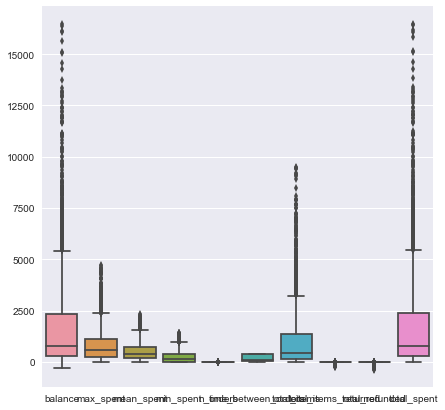

In [197]:
# Plot a sns.boxplot() of the customer dataframe, but just take the first
plt.figure(figsize=(7,7))
sb.boxplot(data = df)

You can see that `n_orders` is defined in a much narrower space than `balance` for example. 
If you were to use the data in an unscaled form, the effect of `balance` might be disproportionnaly high and cause a Machine Learning algorithm to underperform. 

To account for this, it is good practice to center and scale your data, so that all the dimensions fall onto a comparable interval.

**TASKS**

* Define a "scaler" using the `StandardScaler` class imported from `sklearn.preprocessing` (you could also use the `MinMaxScaler` though the `StandardScaler` is more common)
* Apply it on the dataframe using the `fit_transform` method 
* Define a new dataframe similar to the original one but with scaled columns (make sure you specify the `columns` and `index` of the new dataframe using the previous dataframe's `columns` and `index)

In [199]:
# add your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns, index = df.index)
df.head()

,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,
12348,0.839377,1.871973,1.940085,0.684298,-0.017960,-0.910930,3.878407,0.264243,0.343758,0.831104
12350,-0.625333,-0.668624,-0.549172,0.096241,-0.773583,1.096694,-0.588034,0.264243,0.343758,-0.628098
12352,0.009092,0.318938,-0.302796,-0.842609,0.737663,-1.190036,-0.201566,-3.371016,-2.951348,0.052985
12354,-0.304179,0.351826,1.410512,2.599628,-0.773583,1.096694,-0.364712,0.264243,0.343758,-0.308151
12358,-0.580142,-0.525033,-0.273418,0.448501,-0.773583,1.096694,-0.653559,0.264243,0.343758,-0.583077


**TASKS**

Replot the `boxplot` with the scaled data. Observe that now all the features have most of their "mass" (main part of their observed values) in the same range. Note though that scaling does not change the distribution of features and you can still observe that some features are heavily skewed. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


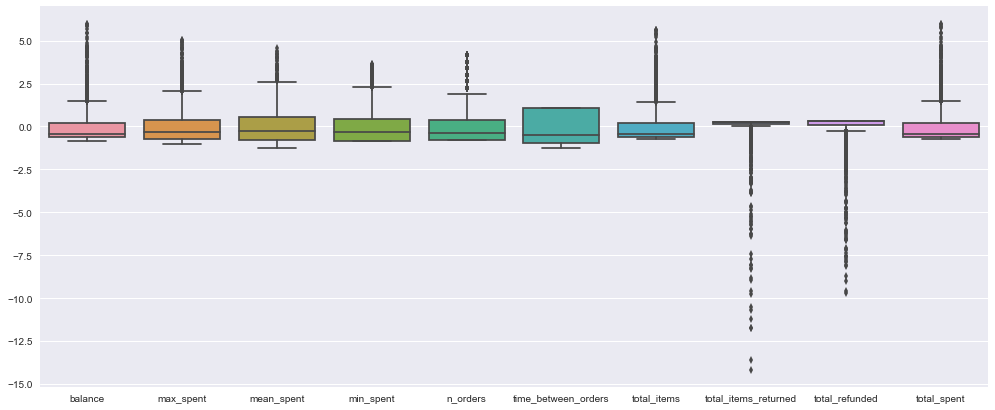

In [201]:
# replot the boxplot with the scaled data
plt.figure(figsize=(17,7))
sb.boxplot(df)

Now that we've done all this pre-processing, it's useful to save the processed dataset for further use. 

**TASKS**

* use the `to_csv()` method on the dataframe
* set the name to `retail_data_postfeng.csv`
* do the same with the `countries` dataframe, call it `retail_data_countries.csv`

In [204]:
# add your code to save the dataframe

## (Bonus) Relationship between input features

An important tool for the exploratory data analysis step is the **scatter plot**. 

This plot helps visualise the relationship in-between two input features. It may also give you a first indication of the Machine Learning model that could be applied and its complexity (linear vs. non-linear). 

Given the small number of features, you can have a look at the `pairplot` of all of the features: a grid where each pair of feature is displayed against the other. This can help seeing the correlations present in your data. 

* use `sns.pairplot` on the DataFrame to visualise this
* can you interpret some of the relations that appear in the grid?

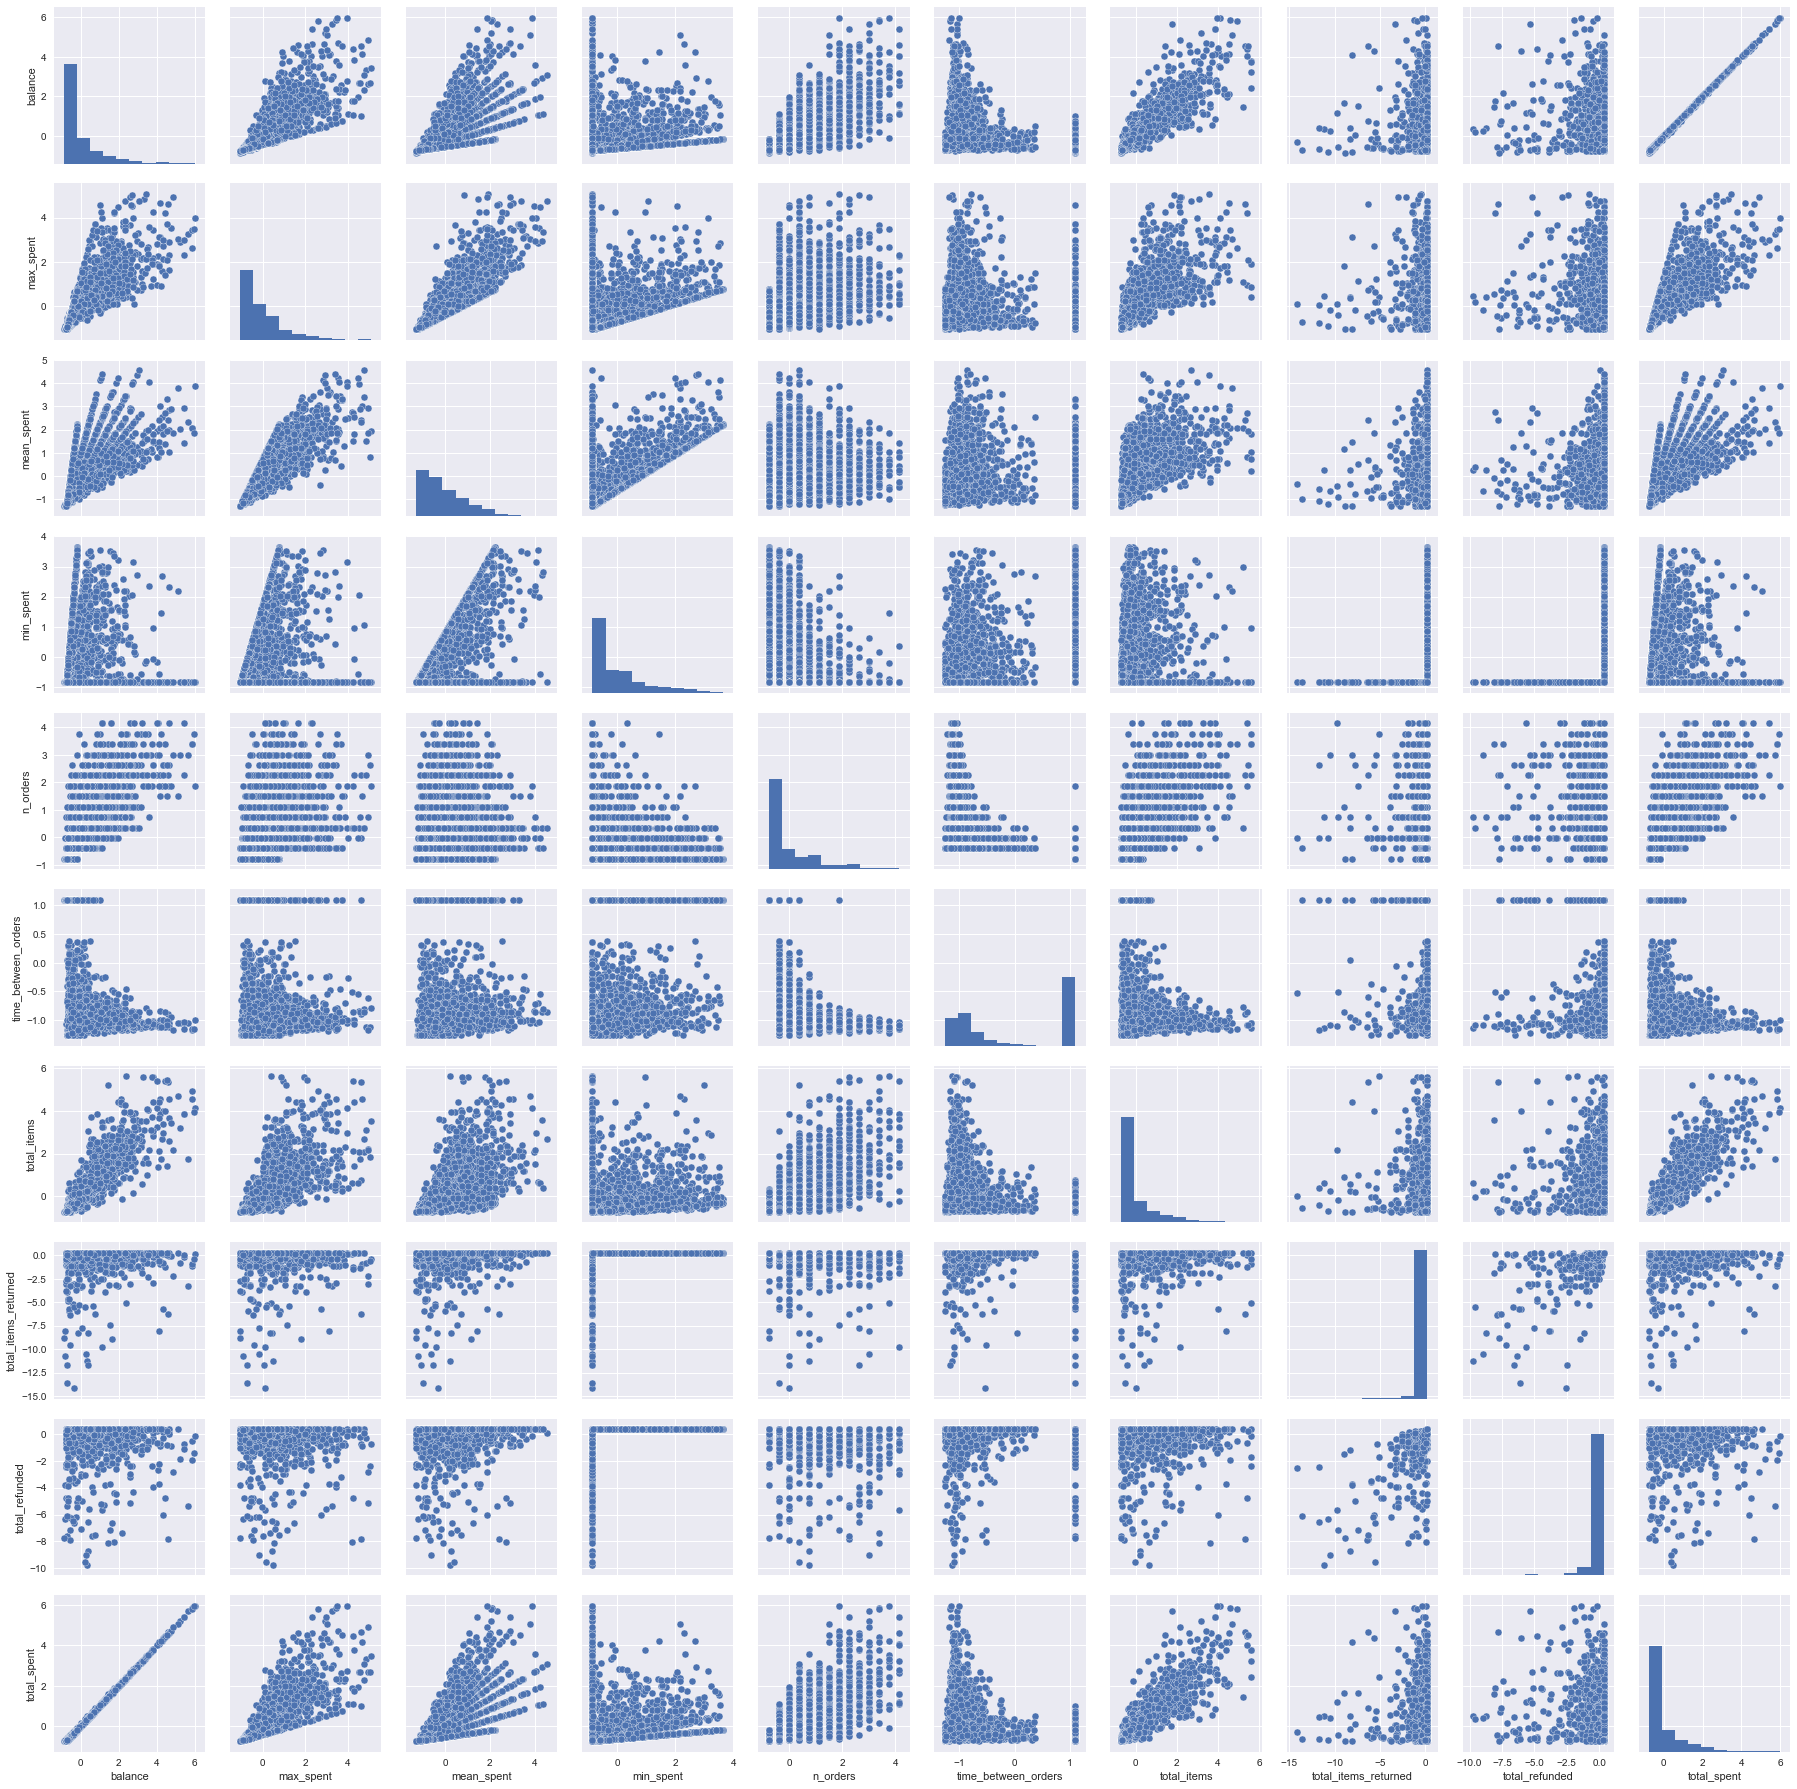

In [205]:
sb.pairplot(df)